In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# !pip install yfinance


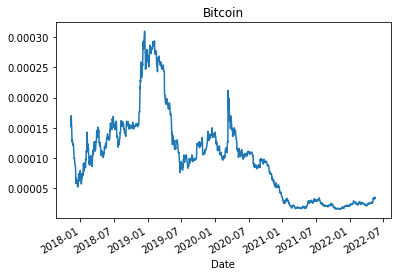

In [4]:
df = yf.download("USDT-BTC", start="2017-01-01", end="2022-05-21", progress=False)

df["Adj Close"].plot(title="Bitcoin");

<AxesSubplot:title={'center':'Generated time series'}>

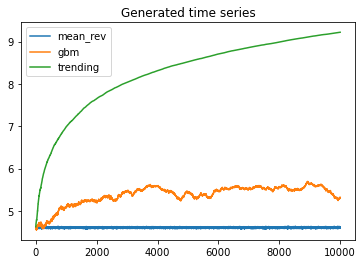

In [6]:
sample_size = 10000
scalar = 100
np.random.seed(123)
dt = pd.DataFrame(data={"mean_rev": np.log(np.random.randn(sample_size) + scalar),
                        "gbm": np.log(np.cumsum(np.random.randn(sample_size)) + scalar),
                        "trending": np.log(np.cumsum(np.random.randn(sample_size) + 1) + scalar)})
dt.plot(title="Generated time series")

In [7]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]

In [8]:
# lags = 20
# for lag in range(2,lags):
#     t = np.std(np.subtract(time_series[lag:] , time_series[:-lag]))
    

In [9]:
a = [1, 2, 3,4 , 5,6 ,7, 65,4 ,3 ,2 ,6,1 ,2,2 , 3,5 ,3 ,21,0]

In [10]:
np.subtract( a[2:], a[:-2])

array([  2,   2,   2,   2,   2,  59,  -3, -62,  -2,   3,  -1,  -4,   1,
         1,   3,   0,  16,  -3])

In [11]:
a[:-2]

[1, 2, 3, 4, 5, 6, 7, 65, 4, 3, 2, 6, 1, 2, 2, 3, 5, 3]

In [16]:
for lag in [5, 10, 20, 40, 80, 160, 320, 1000]:
    hurst_exp = get_hurst_exponent(df["Adj Close"].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 5 lags: 0.5367
Hurst exponent with 10 lags: 0.5437
Hurst exponent with 20 lags: 0.5312
Hurst exponent with 40 lags: 0.5331
Hurst exponent with 80 lags: 0.5271
Hurst exponent with 160 lags: 0.5459
Hurst exponent with 320 lags: 0.4957
Hurst exponent with 1000 lags: 0.2675


In [140]:
a = [1, 2,3, 4, 5, 6 , 7]
b = [2, 45, 6, 53,45,43,7]

In [144]:
reg = np.polyfit(a, b, 1)

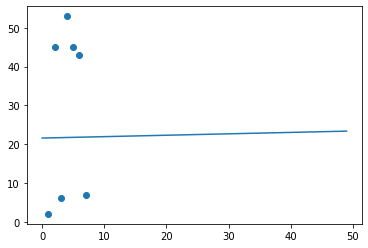

In [149]:
plt.scatter(a,b)
#ax +b 
x = np.linspace(0, 1)
y = reg[0]*x + reg[1]
plt.plot(y)